In [1]:
import cdsapi
import atlite
import geopandas as gpd
import yaml
from yaml.loader import SafeLoader
import rasterio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import shapely


In [25]:
cutout = atlite.Cutout(
    path="/home/felix/PycharmProjects/offshore_LCOE/data/weather/western-europe-2016-01.nc",
    module="era5",
    x=slice(3.0, 18),
    y=slice(51.9096, 60.8479),
    time="2016-01",
)
cutout.prepare()

[########################################] | 100% Completed | 5.34 sms


<Cutout "western-europe-2016-01">
 x = 3.00 ⟷ 18.00, dx = 0.25
 y = 52.00 ⟷ 60.75, dy = 0.25
 time = 2016-01-01 ⟷ 2016-01-31, dt = H
 module = era5
 prepared_features = ['height', 'wind', 'influx', 'temperature', 'runoff']

In [3]:
clc = rasterio.open("/home/felix/PycharmProjects/offshore_LCOE/data/GEBCO_29_May_2023_2c33d4d8c3a0/gebco_2023_n57.0_s52.0_w3.0_e18.0.tif")
band = clc.read(1)
band.shape

(1200, 3600)

In [4]:
clc.index(x = 4, y = 53)

(960, 240)

In [5]:
band[clc.height // 2, clc.width // 2]

-15

In [6]:
clc.transform

Affine(0.0041666666666666675, 0.0, 2.9999999999999982,
       0.0, -0.00416666666666667, 57.0)

In [7]:
clc.transform * (0,0)

(2.9999999999999982, 57.0)

In [13]:
x = 0
x = clc.crs.to_epsg(confidence_threshold=100)

In [14]:
x

4326

In [15]:
gpd.points_from_xy(x = [3], y = [54], crs="EPSG:4326").to_crs(4326)

<GeometryArray>
[<POINT (3 54)>]
Length: 1, dtype: geometry

In [16]:
band[3,54]

-69

In [23]:
with rasterio.open("/home/felix/PycharmProjects/offshore_LCOE/data/GEBCO_29_May_2023_2c33d4d8c3a0/gebco_2023_n57.0_s52.0_w3.0_e18.0.tif") as dataset:
    x, y = (5, 54)
    row, col = dataset.index(x, y)
    band = dataset.read(1)
band[row, col]



-40

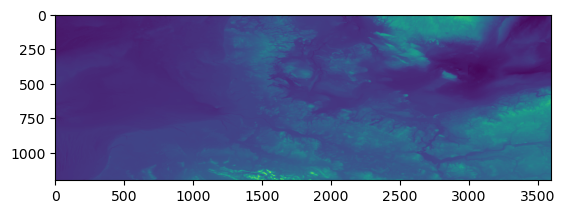

<Axes: >

In [24]:
show(band)